In [1]:
import torch
from torch import nn
from d2l import torch as d2l

一、读取数据集：继续使用Fashion-MNIST数据集，并保持批量大小为256。

In [2]:

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

二、初始化模型参数：softmax回归的输出层是一个全连接层。 因此，为了实现我们的模型， 我们只需在Sequential中添加一个带有10个输出的全连接层

In [3]:
# PyTorch不会隐式地调整输入的形状。因此，
# 我们在线性层前定义了展平层（flatten），来调整网络输入的形状，相当于reshape函数，将0维度变成batchsize.
# 这里的意思应该是输入是256 * 28* 28的批量数据，然后通过展平层展平成256*784的批次吧
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))
#定义初始化函数，m表示当前层，若当前层是线性层的话，则将该线性层的权重设置为均值为0（默认），方差为0.01的随机值
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights) #将初始化函数在应用到net的每一层上

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)

三、定义损失函数：采用交叉熵损失函数

In [4]:
loss = nn.CrossEntropyLoss(reduction='none')

四、定义优化算法：采用学习率为0.1的小批量随机梯度下降算法

In [5]:
trainer = torch.optim.SGD(net.parameters(), lr=0.1)

五、调用训练函数进行训练：这里调用d2l.train_ch3函数，并设置迭代次数为10次

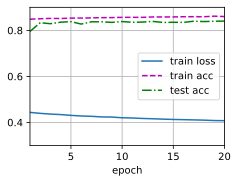

In [7]:
num_epochs = 20
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

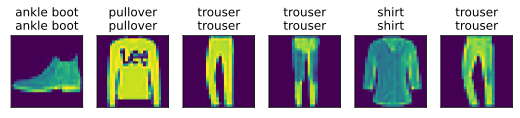

: 

In [8]:
def predict_ch3(net, test_iter, n=6):  #@save
    """预测标签（定义见第3章）"""
    for X, y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y) #真实标号
    preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1)) #预测标号
    titles = [true +'\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(
        X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])

predict_ch3(net, test_iter)